Block 5: 75 burned pixels


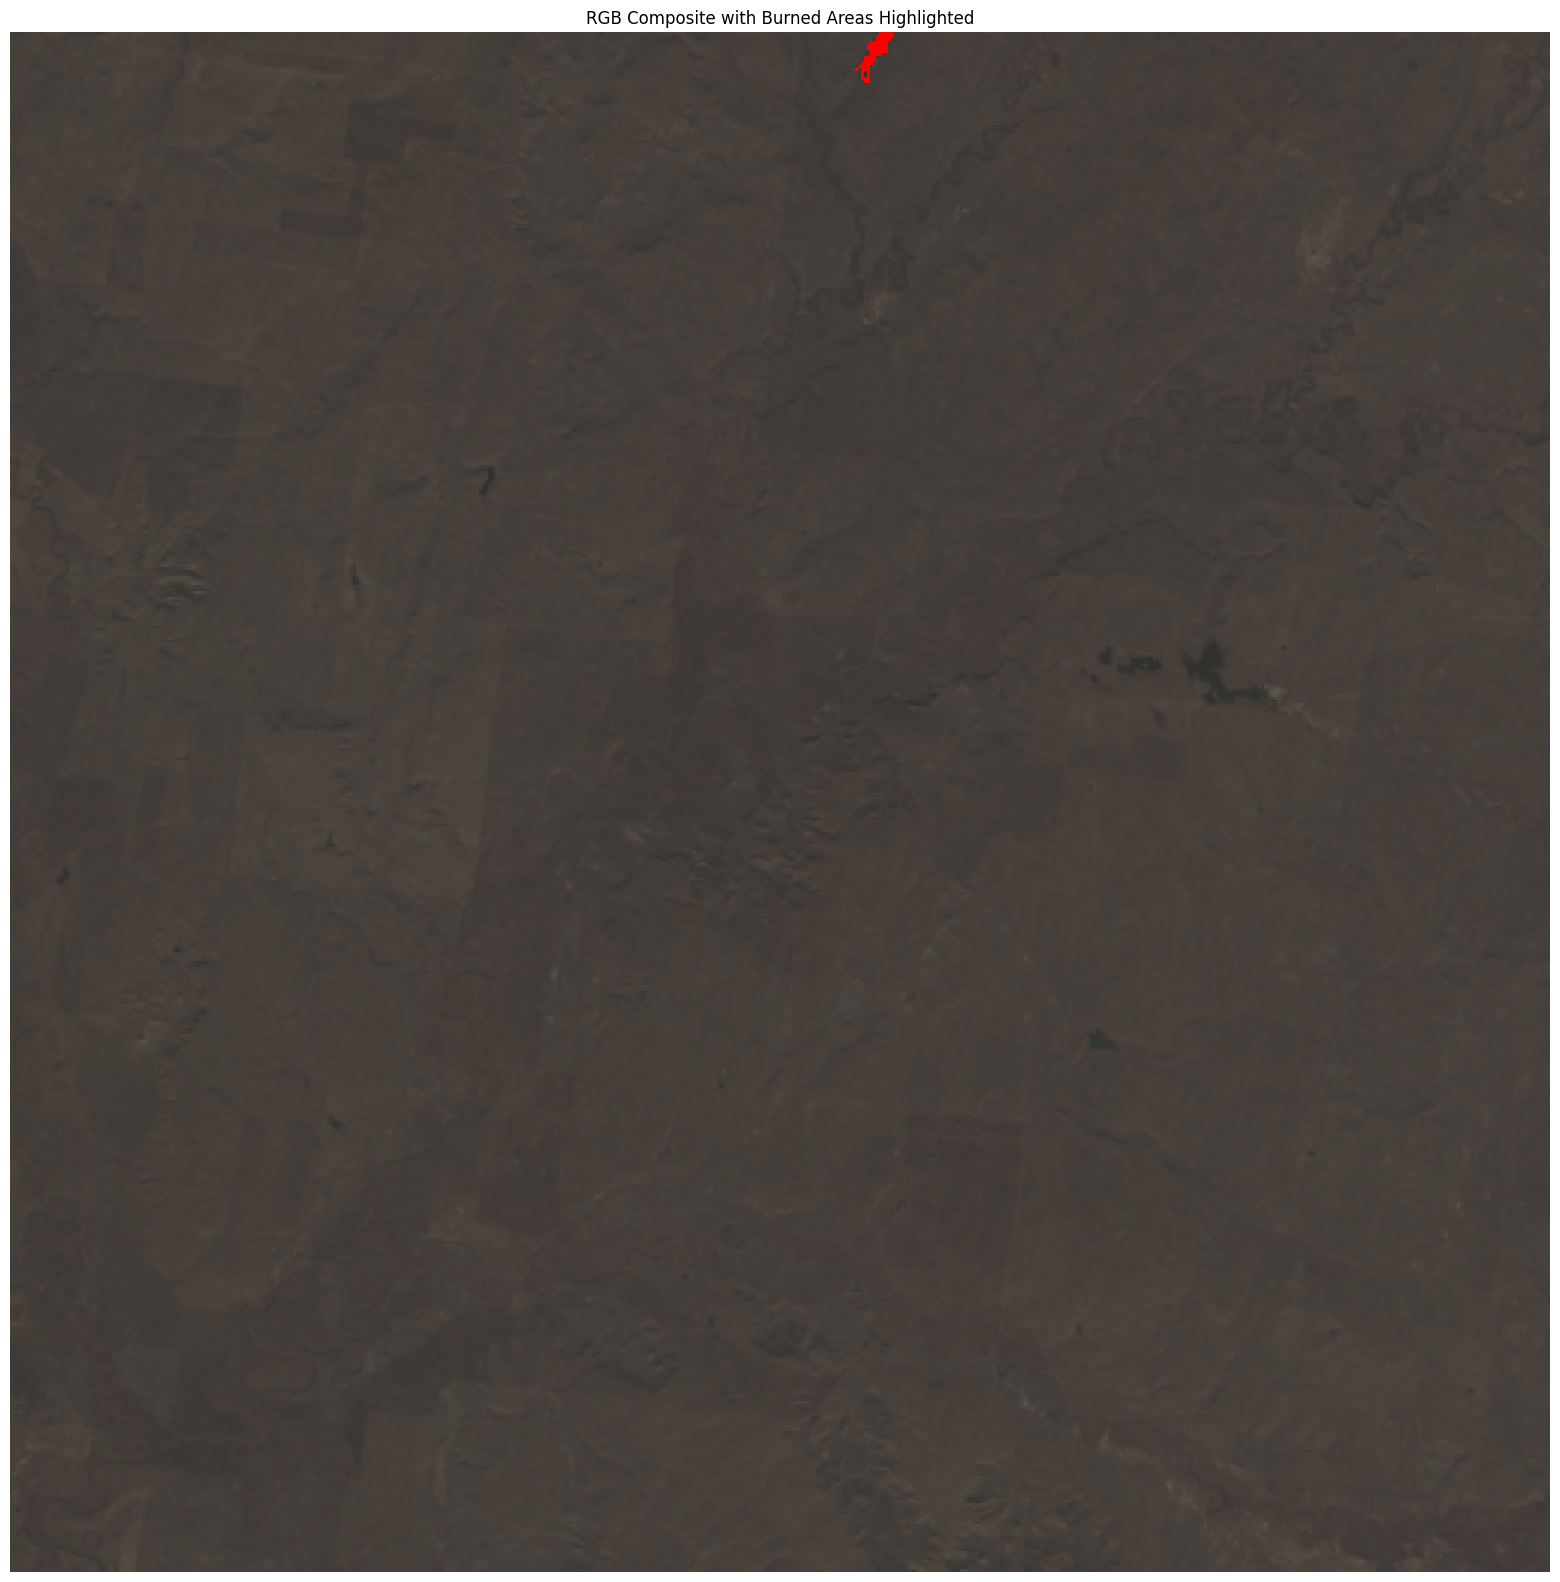

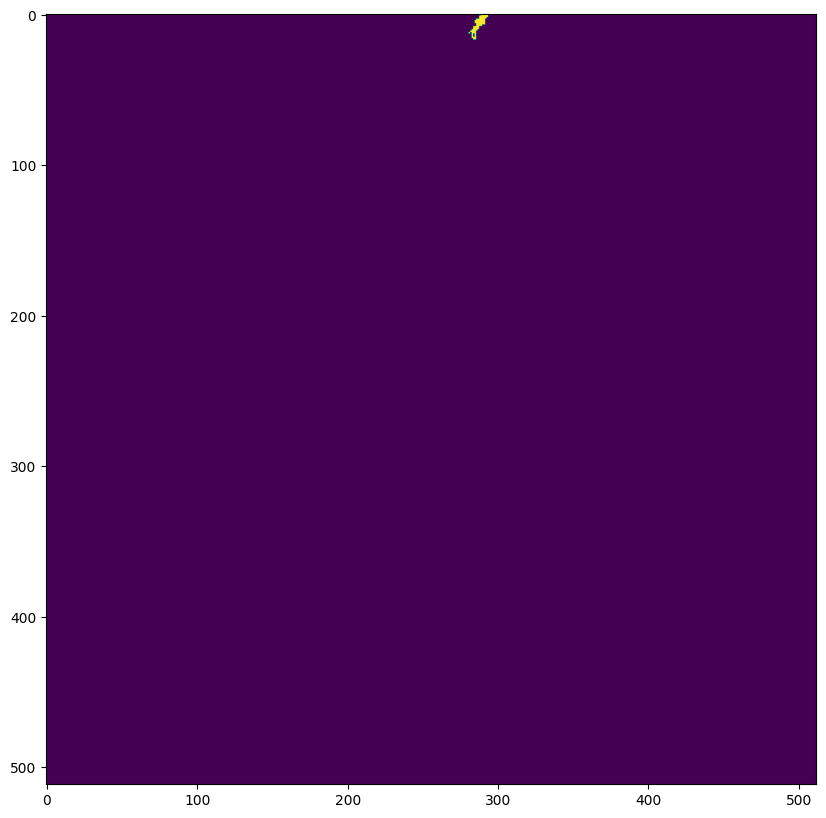

Block 8: 100 burned pixels


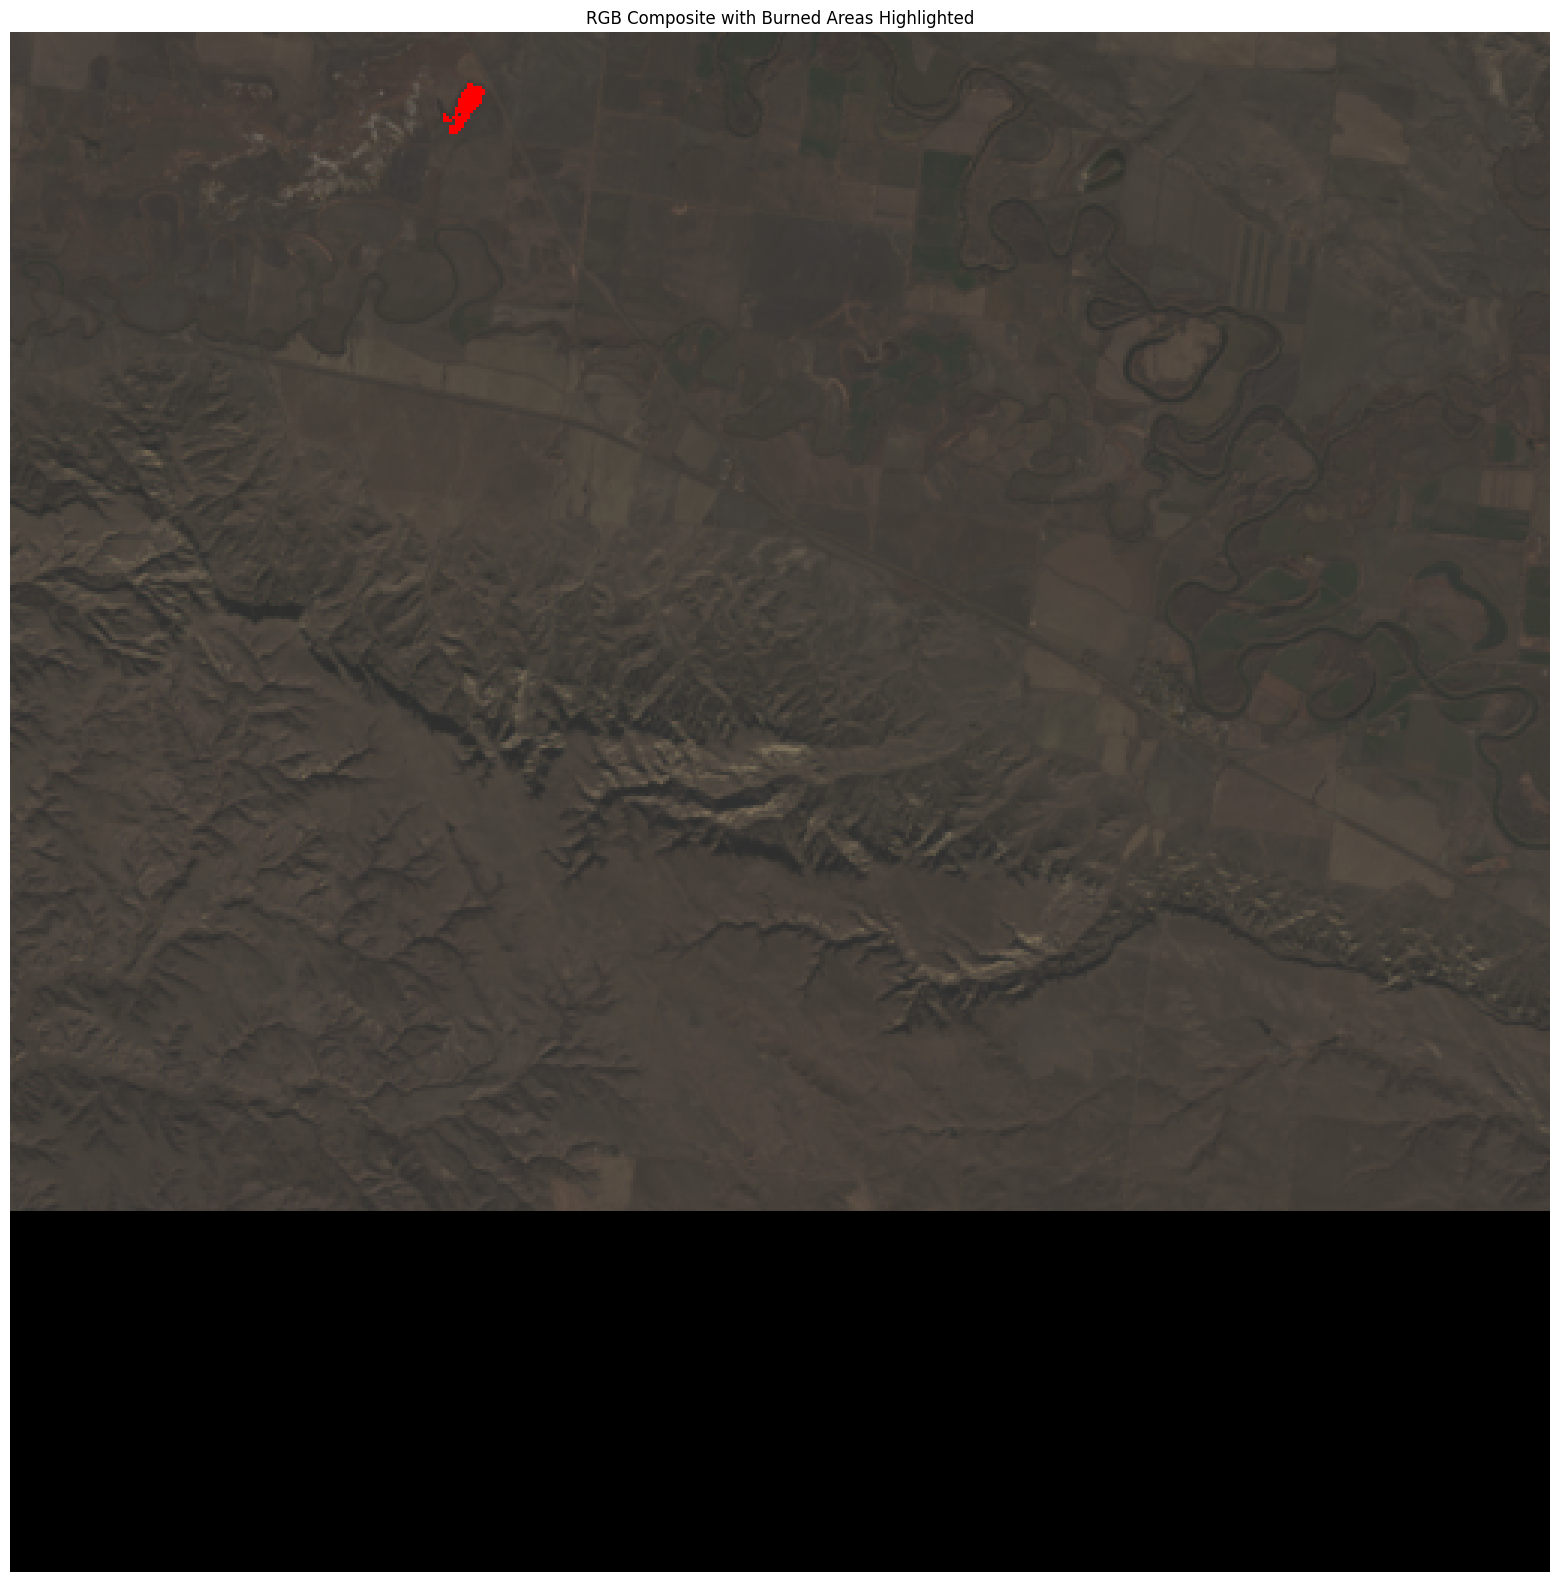

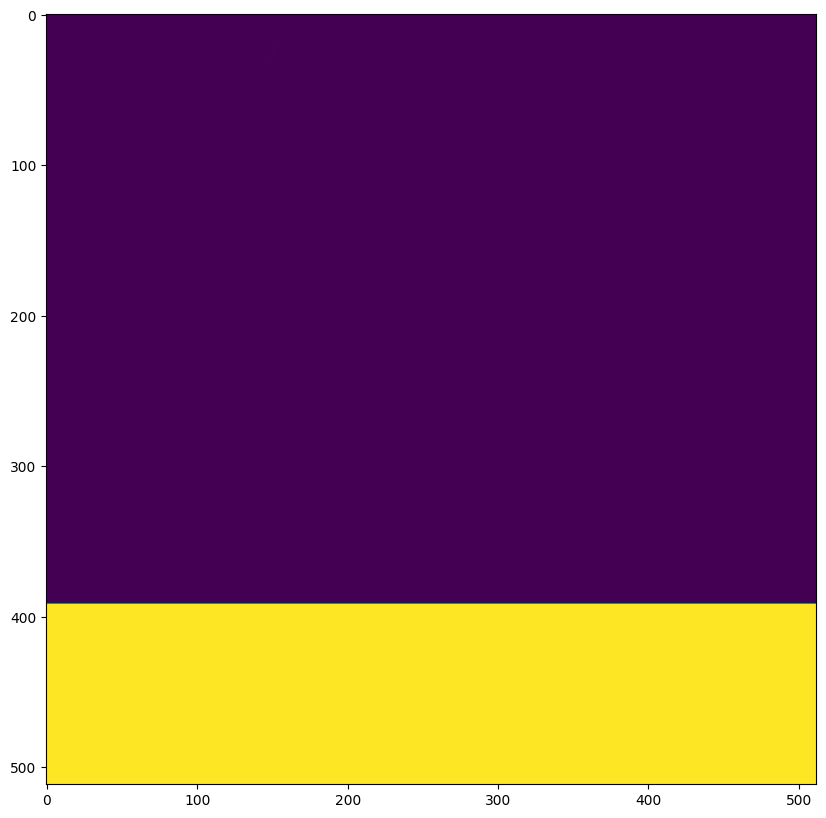

Block 10: 333 burned pixels


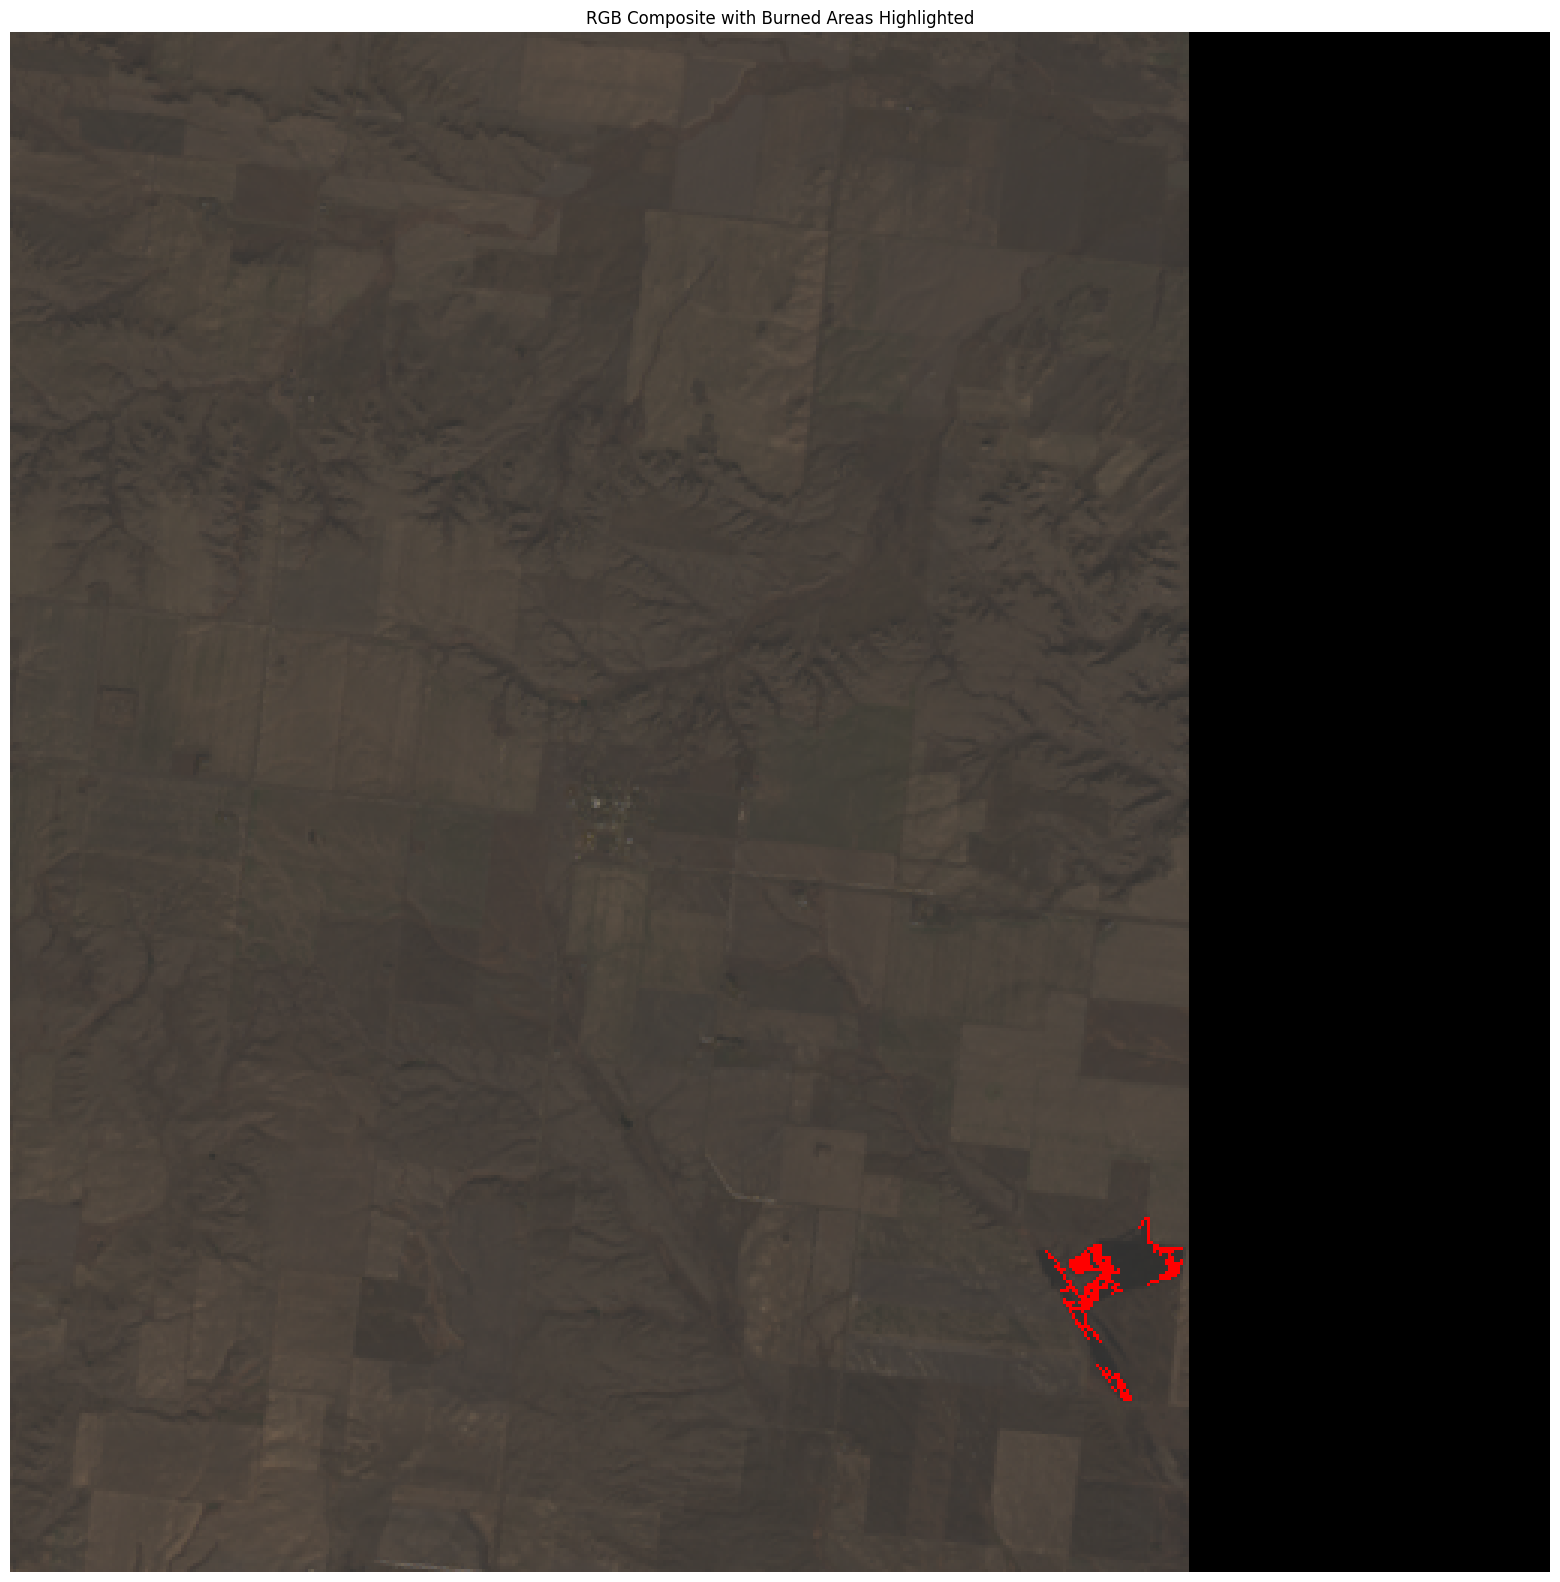

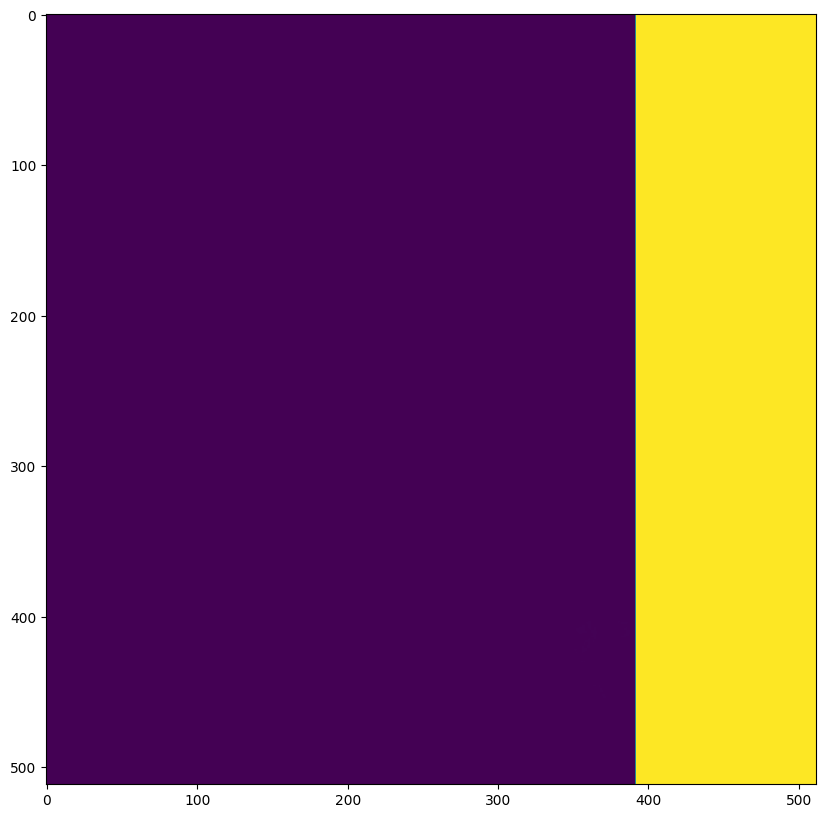

Block 11: 111 burned pixels


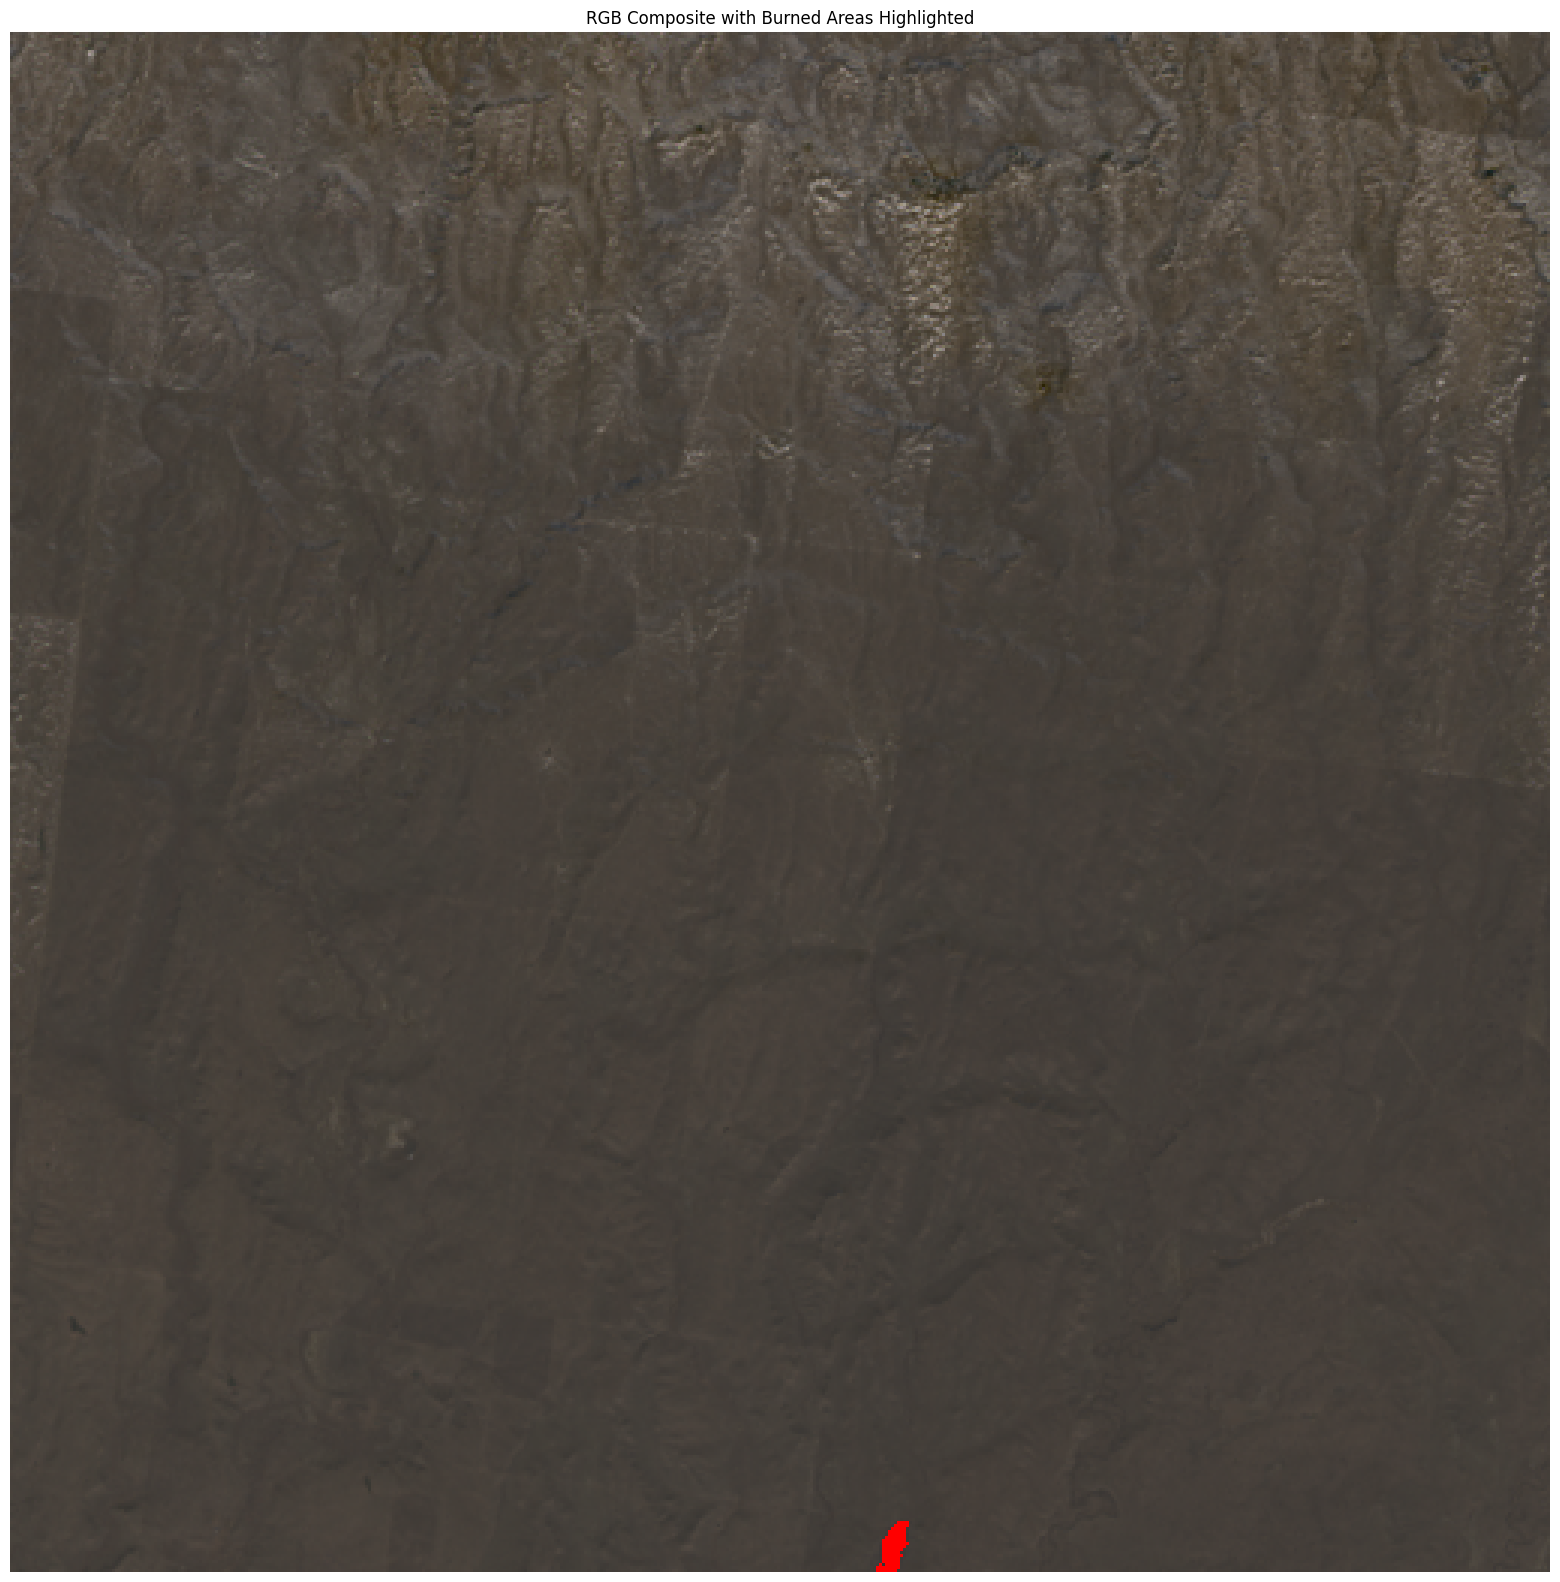

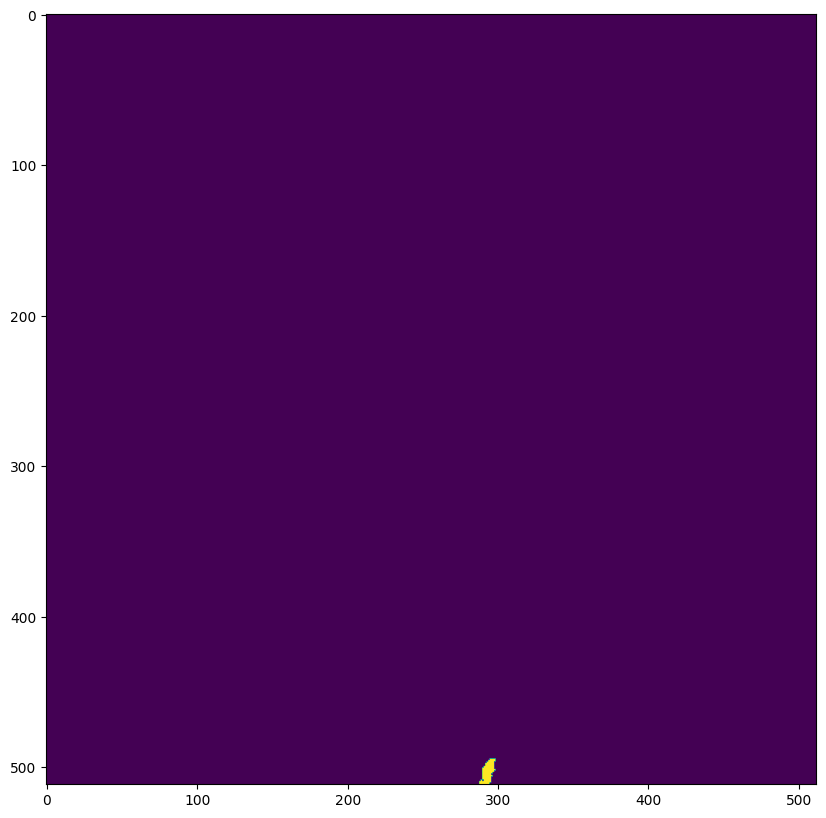

In [ ]:
import os
import numpy as np

from lib.debug import plot_rgb, plot_burned_area_mask, plot_highlighted_rgb

# Load blocks from data folder
data_dir = "./data/"
rgb_blocks = []
mask_blocks = []
for block_path in os.listdir(data_dir):
    # Skip if not the correct file type
    if not block_path.endswith(".npz"):
        continue

    # Load the data and assign to the correct list
    data = np.load(os.path.join(data_dir, block_path))
    rgb_blocks.append(data["rgb"])
    mask_blocks.append(data["mask"])


# Example: Analyze burned area in each block
burned_area_per_block = [np.sum(block == 1) for block in mask_blocks]

# Print the results and show blocks with burned areas
for idx, burned_pixels in enumerate(burned_area_per_block):
    if burned_pixels > 0:
        print(f"Block {idx}: {burned_pixels} burned pixels")
        plot_highlighted_rgb(rgb_blocks[idx], mask_blocks[idx])
        plot_burned_area_mask(mask_blocks[idx])